In [1]:
%matplotlib notebook
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
%config InlineBackend.figure_format = 'svg'

from matplotlib.pyplot import*
from numpy import zeros, array,log,dot,sqrt,conjugate,real,imag,arange,transpose
from scipy.sparse.linalg import eigs
from scipy.linalg import eigh,eig,expm
from scipy.optimize import minimize
from copy import deepcopy
from time import time
import pickle
from scipy.sparse.linalg import eigs

In [2]:
def shannon_st(st):
    s=0
    for a in st:
        if abs(a)>0.000000001:
            s-=abs(a**2)*log(abs(a**2))
    return s

In [3]:
def Hamiltonian_w(lambd):
    H=zeros((17,17))
    for m in range(16):
        st_string=bin(m)[2:]
        st_string='0'*(4-len(st_string))+st_string
        for i in range(4):
            new_string=st_string[:i]+str(1-int(st_string[i]))+st_string[i+1:]
            n=int(new_string,2)
            H[n,m]=1
        H[m,m]=lambd*4        
    H[0,0]=lambd*5
    H[16,16]=lambd
    H[0,16]=1
    H[16,0]=1
    return H

In [4]:
def Hamiltonian(lambd):
    H=zeros((18,18))
    for m in range(16):
        st_string=bin(m)[2:]
        st_string='0'*(4-len(st_string))+st_string
        for i in range(4):
            new_string=st_string[:i]+str(1-int(st_string[i]))+st_string[i+1:]
            n=int(new_string,2)
            H[n,m]=1
        H[m,m]=lambd*4        
    H[0,0]=lambd*5
    H[15,15]=lambd*5
    H[16,16]=lambd
    H[17,17]=lambd
    H[0,16]=1
    H[16,0]=1
    H[15,17]=1
    H[17,15]=1
    return H

In [5]:
fpq_w=zeros((17,17))
for i in range(15):
    fpq_w[i,i]=4
fpq_w[15,15]=5
fpq_w[16,16]=1

In [6]:
fpq=zeros((18,18))
for i in range(16):
    fpq[i,i]=4
fpq[0,0]=5
fpq[15,15]=5
fpq[17,17]=1
fpq[16,16]=1

In [7]:
reps=[3,1,0,16]
labs=[r'$n\in\{$' for i in range(4)]
for i in range(1,15):
    l=sum([int(c) for c in bin(i)[2:]])
    labs[l%2]+='{},'.format(i)
labs[2]+='0,15,'
labs[3]+='16,17,'
for i in range(4):
    labs[i]=labs[i][:-1]+'$\}$'
cls=['midnightblue','tab:blue','maroon','chocolate']

<IPython.core.display.Javascript object>


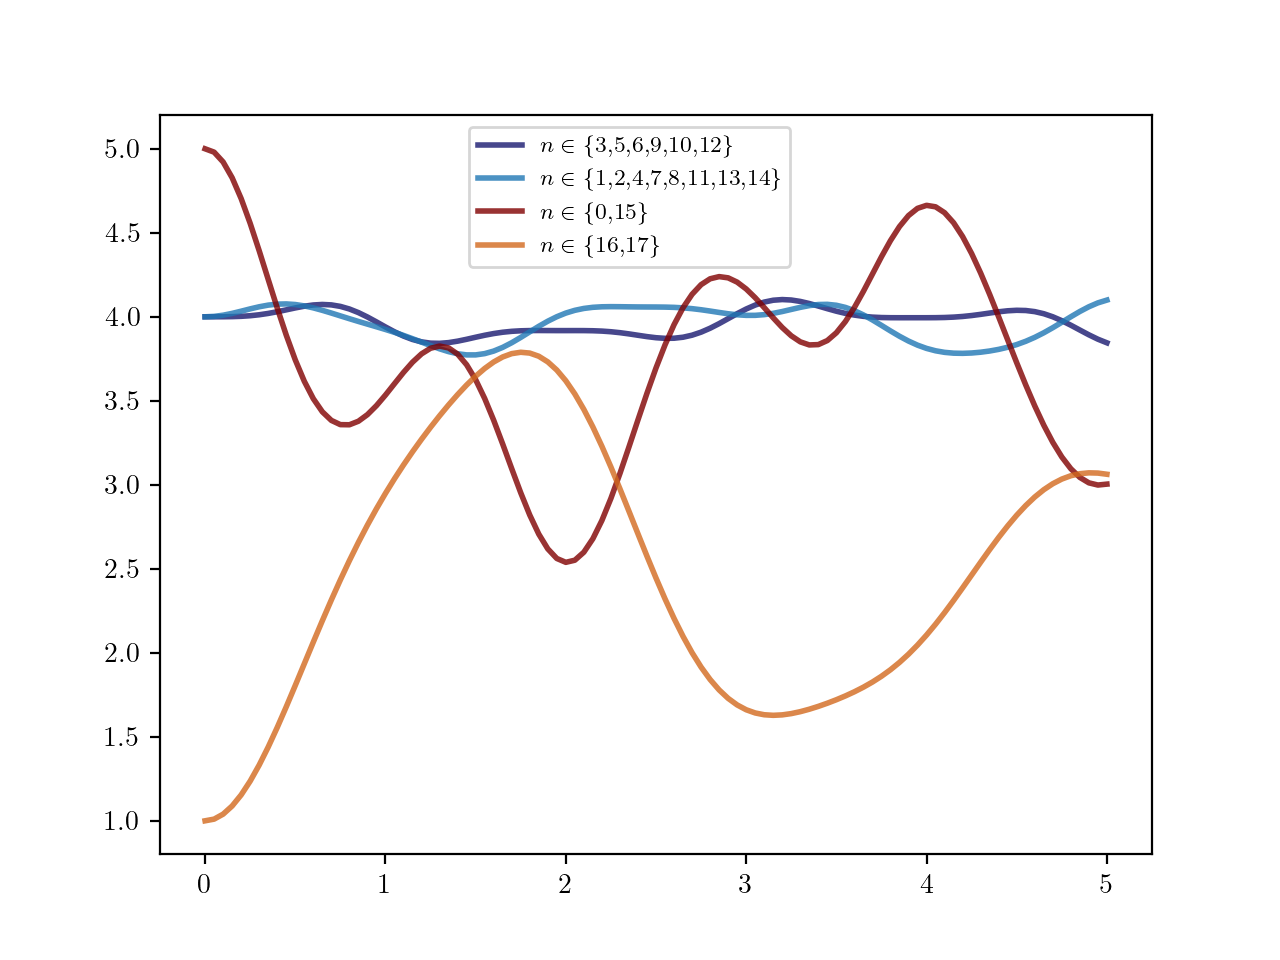

In [8]:
H=Hamiltonian(.0)
dt=.05
U=expm(-1.j*dt*H)
for i,n in enumerate(reps):
    v0=zeros(18)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(18,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(100):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=labs[i],linewidth=2,alpha=.8,color=cls[i])
    #if n==0:
    #    plot(xx,yy,'r-',label=n,linewidth=2,alpha=.8)
    #else:
    #    plot(xx,yy,'k-',label=n,linewidth=2,alpha=.05)
#title('Time Evolution of average number of flippable plaquettes from different initial states')
legend(bbox_to_anchor=(0.3, .78),fontsize=8)
savefig('cross_plaquettes.png',dpi=500)

In [10]:
legend(bbox_to_anchor=(0.42, 0.65),fontsize=8)

<IPython.core.display.Javascript object>


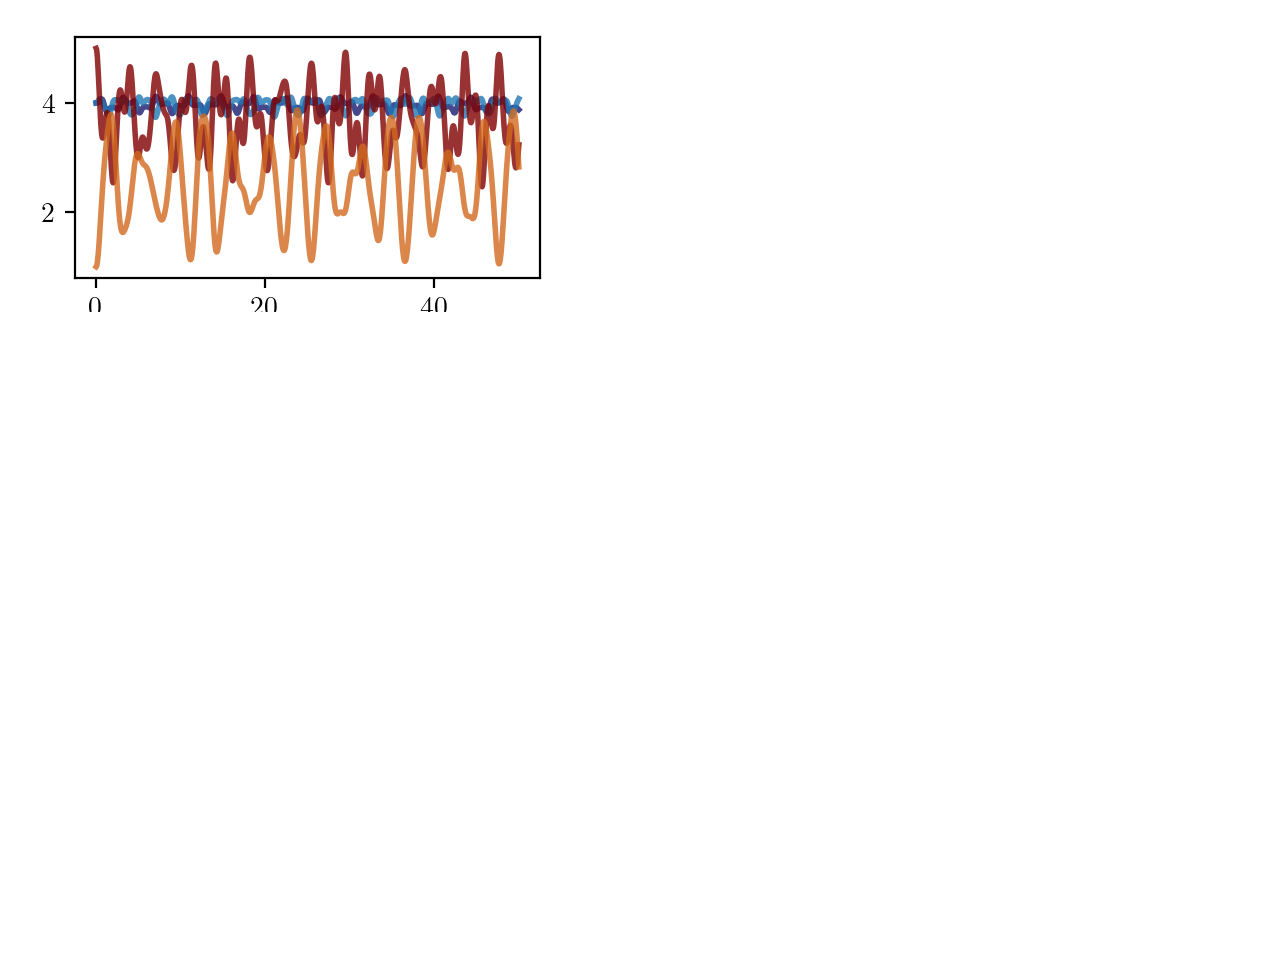

In [9]:
H=Hamiltonian(.0)
dt=.05
U=expm(-1.j*dt*H)
for i,n in enumerate(reps):
    v0=zeros(18)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(18,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(1000):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=labs[i],linewidth=2,alpha=.8,color=cls[i])
    #if n==0:
    #    plot(xx,yy,'r-',label=n,linewidth=2,alpha=.8)
    #else:
    #    plot(xx,yy,'k-',label=n,linewidth=2,alpha=.05)
#title('Time Evolution of average number of flippable plaquettes from different initial states')
savefig('cross_plaquettes_longtime.png',dpi=500)

<IPython.core.display.Javascript object>


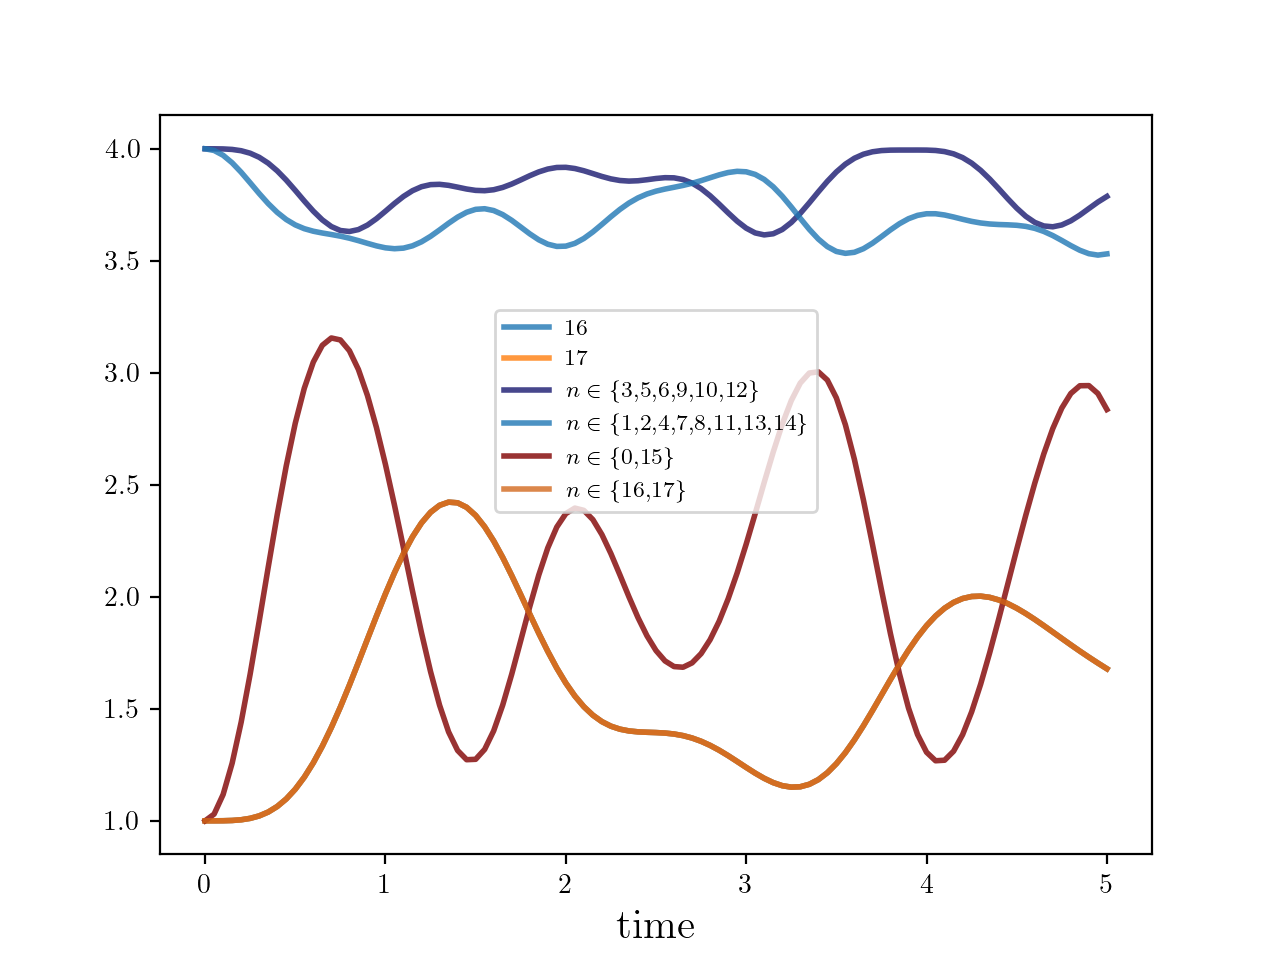

Text(0.5, 0, 'time')

In [38]:
H=Hamiltonian(.0)
dt=.05
U=expm(-1.j*dt*H)
for i,n in enumerate([16,17]):
    v0=zeros(18)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(18,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(100):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=n,linewidth=2,alpha=.8)
    #if n==0:
    #    plot(xx,yy,'r-',label=n,linewidth=2,alpha=.8)
    #else:
    #    plot(xx,yy,'k-',label=n,linewidth=2,alpha=.05)
legend(loc=0)
#title('Time Evolution of average number of flippable plaquettes from different initial states')
xlabel('time',size=15)

<IPython.core.display.Javascript object>


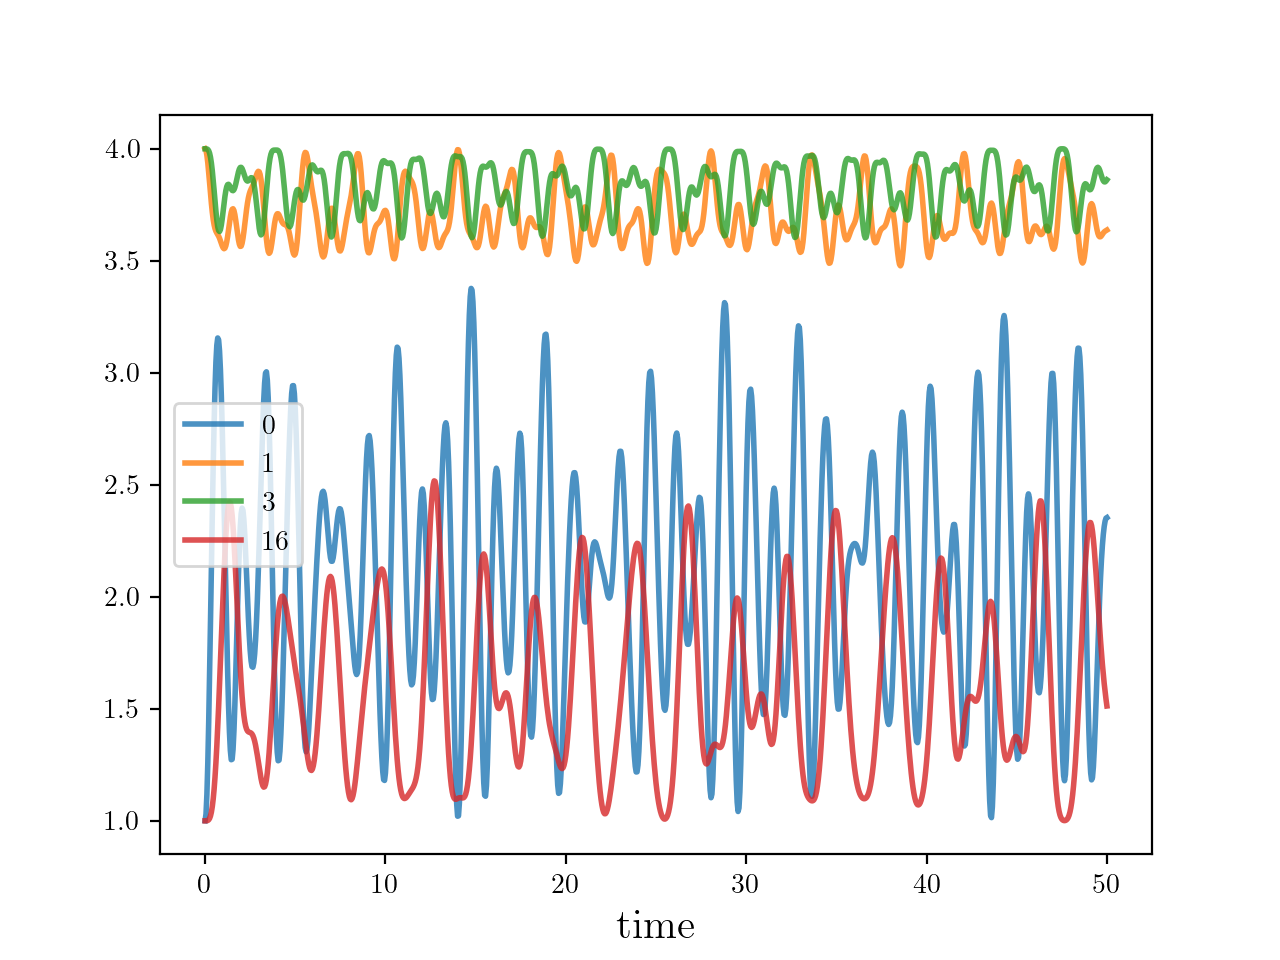

Text(0.5, 0, 'time')

In [10]:
H=Hamiltonian(.0)
dt=.05
U=expm(-1.j*dt*H)
for n in [0,1,3,16]:
    v0=zeros(18)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(18,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(1000):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=n,linewidth=2,alpha=.8)
    #if n==0:
    #    plot(xx,yy,'r-',label=n,linewidth=2,alpha=.8)
    #else:
    #    plot(xx,yy,'k-',label=n,linewidth=2,alpha=.05)
legend(loc=0)
#title('Time Evolution of average number of flippable plaquettes from different initial states')
xlabel('time',size=15)

<IPython.core.display.Javascript object>


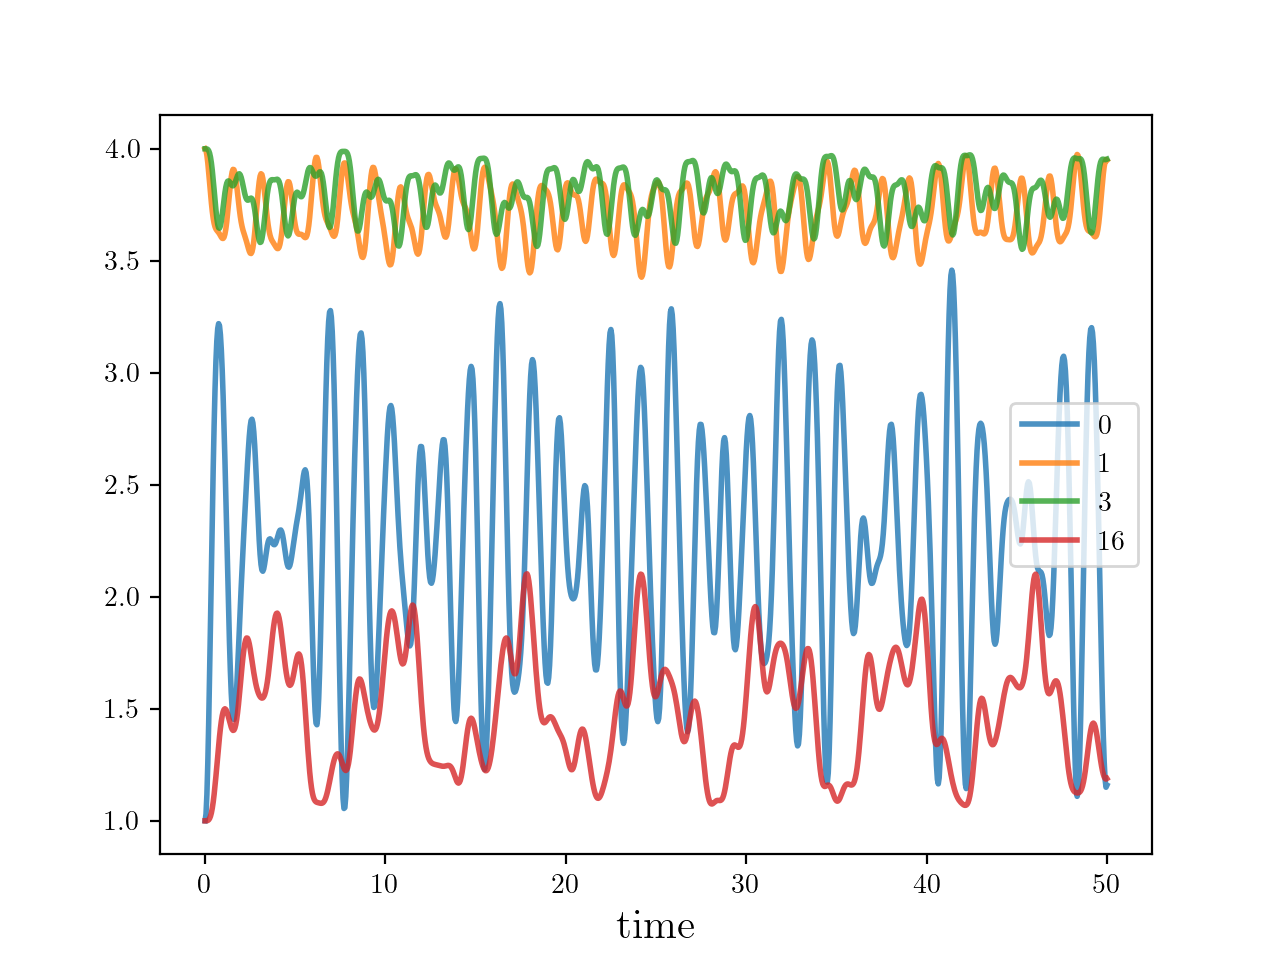

Text(0.5, 0, 'time')

In [9]:
H=Hamiltonian(-1.)
dt=.05
U=expm(-1.j*dt*H)
for n in [0,1,3,16]:
    v0=zeros(18)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(18,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(1000):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=n,linewidth=2,alpha=.8)
    #if n==0:
    #    plot(xx,yy,'r-',label=n,linewidth=2,alpha=.8)
    #else:
    #    plot(xx,yy,'k-',label=n,linewidth=2,alpha=.05)
legend(loc=0)
#title('Time Evolution of average number of flippable plaquettes from different initial states')
xlabel('time',size=15)

In [10]:
w,v=eigh(Hamiltonian(0.))

In [11]:
sh=[shannon_st(v[:,i]) for i in range(18)]

<IPython.core.display.Javascript object>


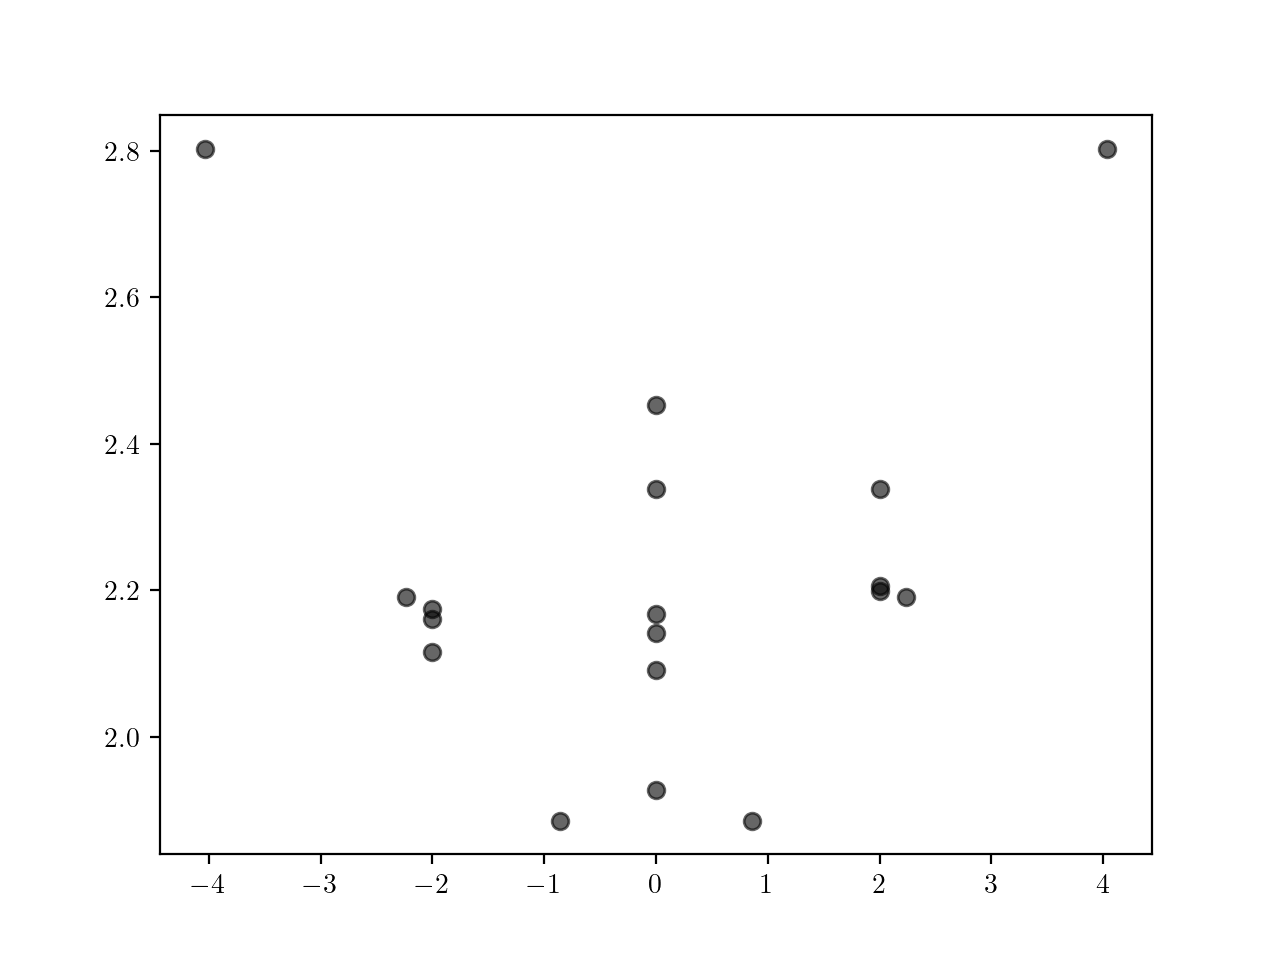

In [13]:
plot(w,sh,'ko',alpha=.6)
savefig('shannon_cross',dpi=500)

In [14]:
for i,si in enumerate(sh):
    if si<2:
        print(i,si)

5 1.8854918980771738
7 1.9273939705392893
12 1.8854918980771758


In [15]:
for i,s in enumerate(sh):
    print(i,s)

0 2.8029223571771174
1 2.19101331733694
2 2.1746375479470648
3 2.1160478581677498
4 2.1615461223624126
5 1.8854918980771738
6 2.453720093380284
7 1.9273939705392893
8 2.3383136001153977
9 2.091567330716253
10 2.1683368875826856
11 2.1419191237555713
12 1.8854918980771758
13 2.19860367910138
14 2.337985419483317
15 2.2059310808076438
16 2.191013317336941
17 2.802922357177118


In [24]:
plot(range(18),v[:,5],'o-',color='maroon',alpha=.4)
#plot(range(18),v[:,6],'o-',color='midnightblue')
plot(range(18),v[:,12],'s-',color='maroon',alpha=.4)
savefig('scar_state.png',dpi=500)

<IPython.core.display.Javascript object>


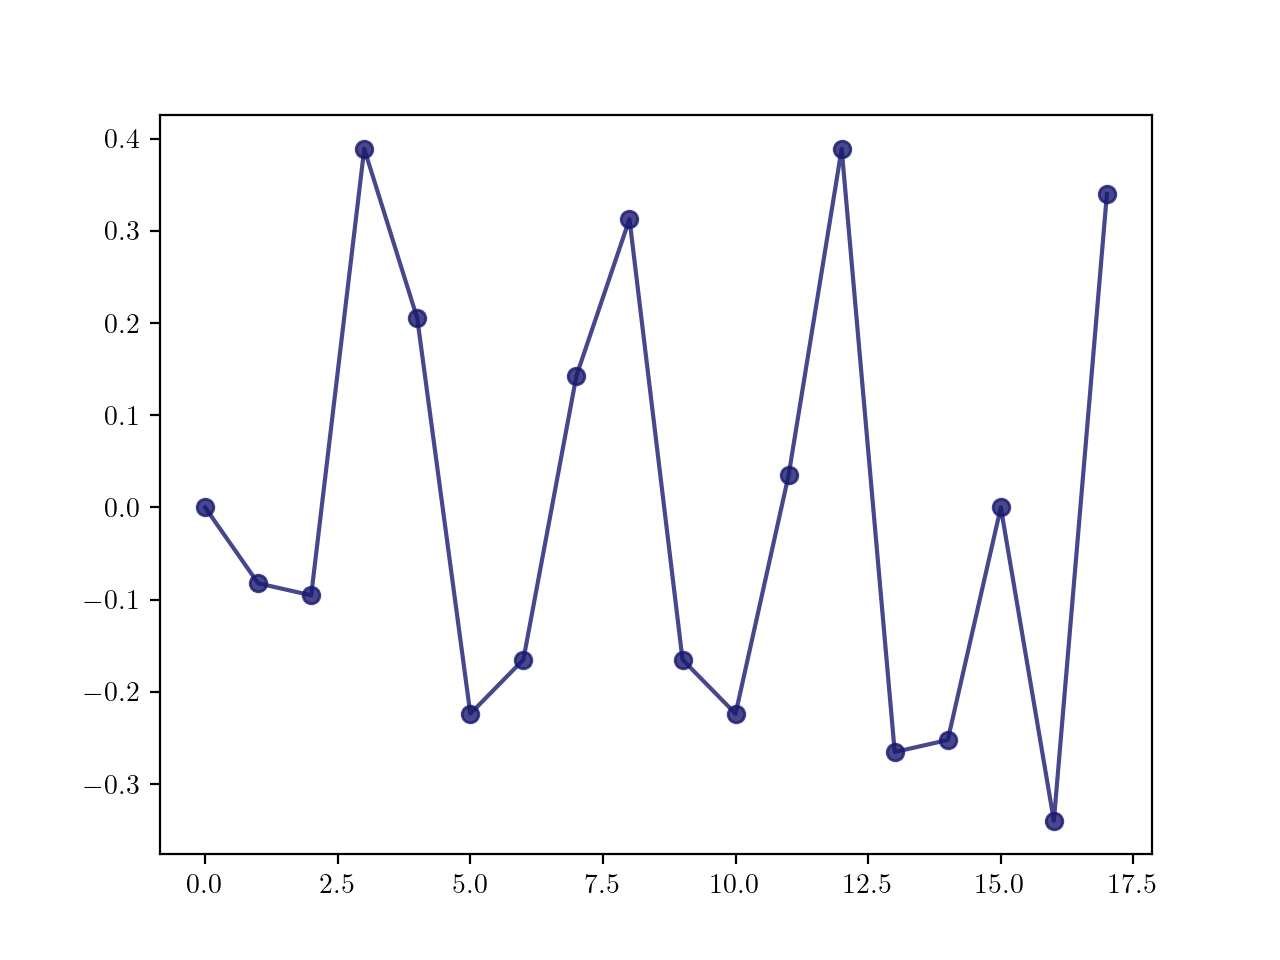

In [23]:
plot(range(18),v[:,6],'o-',color='midnightblue',alpha=.8)
savefig('non_scar_state.png',dpi=500)